In [515]:
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
# pd.set_option('display.max_rows', None)
pd.reset_option("max_rows")

In [ ]:
open_data = pd.read_excel("open_loan_consumer.xlsx")

open_data.head()

In [ ]:
#Check the datatypes because we need to transfrom it before we can use the data
open_data.dtypes

In [ ]:
# Change the columns contain "Tgl", "YYMMDD" column because the data aren't set correctly in datetime data type

open_data['Tgl_Jatuh_Tempo_Angsuran'] = pd.to_datetime(open_data['Tgl_Jatuh_Tempo_Angsuran'].astype(str), format='%Y%m%d.%f', errors='coerce')
open_data["YYMMDD"] = pd.to_datetime(open_data["YYMMDD"], format='%Y%m%d', errors='coerce')

open_data.head()

In [ ]:
# Change the columns contain "Tgl", "YYMMDD" column because the data aren't set correctly in datetime data type
for column in open_data.columns:
    if "Tgl" in column:
        open_data[column] = pd.to_datetime(open_data[column], format='%Y%m%d', errors='coerce')
open_data.head(10)

In [ ]:
# Custom function to clean and convert values
def clean_and_convert(value):
    if isinstance(value, str):
        # Remove ".00" from string values
        value = value.replace(".00", "")
    try:
        # Attempt to convert to integer
        return int(value)
    except (ValueError, TypeError):
        # Handle non-convertible values
        return None


In [ ]:
open_data['No_KTP'] = open_data['No_KTP'].apply(clean_and_convert).astype(str)
open_data.head()


In [ ]:
open_data = open_data.drop(columns=["Nama_Mitra_JF", "Tgl_Input_JF", "Tgl_Pelunasan"])
open_data.head()

In [ ]:
closed_data = pd.read_excel("closed_loan_consumer.xlsx")
closed_data.head()

In [ ]:
closed_data.dtypes

In [ ]:
closed_data["YYMMDD"] = pd.to_datetime(closed_data["YYMMDD"], format='%Y%m%d', errors='coerce')

for column in closed_data.columns:
    if "Tgl" in column:
        closed_data[column] = pd.to_datetime(closed_data[column], format= '%Y%m%d', errors='coerce')


closed_data.head()


In [ ]:
closed_data["No."] = closed_data["No."].astype(str).str.replace(r'\.0$', '', regex=True)
closed_data.head()

In [ ]:
# closed_data = closed_data.drop(columns="Tgl_Pelunasan.1")
closed_data = closed_data.drop(columns=["Nama_Mitra_JF", "Tgl_Input_JF", ])
closed_data


In [ ]:
# Searching for the first column that contain nan
rows_list = []
for rows in closed_data.index:
    if closed_data['No.'][rows] == 'nan':
        rows_list.append(rows)


min_value = min(rows_list)
max_value = max(rows_list)

# print(f'Min {min_value} \n Max {max_value}')
closed_data = closed_data.drop(closed_data.index[min_value:max_value+1])


In [ ]:
closed_data

In [ ]:
cd = closed_data.copy()
od = open_data.copy()

In [ ]:
cd = cd.rename(columns = {"No._CIF" : "No_CIF", "No._SK" : "No_SK", "No._KTP" : "No_KTP"})
cd = cd.drop(columns="Tgl_Pelunasan.1")
cd


In [ ]:
cd.shape

In [ ]:
cd["Pelunasan_Nopen"] = cd["Tgl_Pelunasan"]
cd["Pelunasan_KTP"] = cd["Tgl_Pelunasan"]
cd["Pelunasan_SK"] = cd["Tgl_Pelunasan"]
cd

In [ ]:
idx = cd.dropna(subset=['Tgl_Pelunasan']).groupby("Nomor_Pensiun")["Tgl_Pelunasan"].idxmax()
cd_nopen = cd.loc[idx].copy()
cd_nopen.reset_index(drop=True, inplace=True)
cd_nopen


In [ ]:
idx = cd.dropna(subset=['Tgl_Pelunasan']).groupby("No_SK")["Tgl_Pelunasan"].idxmax()
cd_sk = cd.loc[idx].copy()
cd_sk.reset_index(drop=True, inplace=True)
cd_sk


In [ ]:
idx = cd.dropna(subset=['Tgl_Pelunasan']).groupby("No_KTP")["Tgl_Pelunasan"].idxmax()
cd_ktp = cd.loc[idx].copy()
cd_ktp.reset_index(drop=True, inplace=True)
cd_ktp


In [ ]:
od["No_KTP"] =od["No_KTP"].astype(str)

list_data = [od["Nomor_Pensiun"], cd["Nomor_Pensiun"], cd_nopen["Nomor_Pensiun"], cd_sk["Nomor_Pensiun"], cd_ktp["Nomor_Pensiun"]
             , od["No_KTP"], cd["No_KTP"], cd_nopen["No_KTP"], cd_sk["No_KTP"], cd_ktp["No_KTP"]
             , od["No_SK"], cd["No_SK"], cd_nopen["No_SK"], cd_sk["No_SK"], cd_ktp["No_SK"]]

for i in list_data:
    print(f'{i.dtypes}')

# Check Data types of "Tgl Akad" make sure all in the same datatypes
list_data = [od["Tgl_Akad"], cd["Pelunasan_Nopen"], cd_nopen["Pelunasan_Nopen"], cd_sk["Pelunasan_Nopen"], cd_ktp["Pelunasan_Nopen"]
             , od["Tgl_Akad"], cd["Pelunasan_Nopen"], cd_nopen["Pelunasan_Nopen"], cd_sk["Pelunasan_Nopen"], cd_ktp["Pelunasan_Nopen"]
             , od["Tgl_Akad"], cd["Pelunasan_Nopen"], cd_nopen["Pelunasan_Nopen"], cd_sk["Pelunasan_Nopen"], cd_ktp["Pelunasan_Nopen"]]

for i in list_data:
    print(f'{i.dtypes}')

In [ ]:
# Convert No_KTP columns to string type
# Because the data cannot be lookup to another df -On excel there are same data on open data and closed data 
od["No_KTP"] = od["No_KTP"].astype(str)
cd["No_KTP"] = cd["No_KTP"].astype(str)
cd_nopen["No_KTP"] = cd_nopen["No_KTP"].astype(str)
cd_sk["No_KTP"] = cd_sk["No_KTP"].astype(str)
cd_ktp["No_KTP"] = cd_ktp["No_KTP"].astype(str)

# List of columns to trim
columns_to_trim = ["Nomor_Pensiun", "No_KTP", "No_SK"]

# List of DataFrames
dataframes = [od, cd, cd_nopen, cd_sk, cd_ktp]

# Trim whitespace from strings in specified columns
for column in columns_to_trim:
    for df in dataframes:
        df[column] = df[column].str.strip()

# Display the data types after trimming
for i, column in enumerate(columns_to_trim):
    print(f'Data types after trimming for column {column}:')
    for df in dataframes:
        print(df[column].dtypes)
    print('\n')


In [ ]:
cd_nopen_list = ["Nomor_Pensiun", "Pelunasan_Nopen"]
cd_sk_list = ["No_SK", "Pelunasan_SK"]
cd_ktp_list = ["No_KTP", "Pelunasan_KTP"]


merge_data = pd.merge(od, cd_nopen[cd_nopen_list], on="Nomor_Pensiun", how="left")
merge_data = pd.merge(merge_data, cd_sk[cd_sk_list], on="No_SK", how="left")
merge_data = pd.merge(merge_data, cd_ktp[cd_ktp_list], on="No_KTP", how="left")
merge_data


In [ ]:
# Check Data are Valid
# Filter rows where at least one value in 'Pelunasan_Nopen' is not NaN
filtered_data = merge_data[['Pelunasan_Nopen', 'Pelunasan_SK', 'Pelunasan_KTP']].notna().any(axis=1)
# merge_data[filtered_data]
result = merge_data[filtered_data]

# Sort the resulting DataFrame based on the 'Pelunasan_Nopen' column
result_sorted = result.sort_values(by='Pelunasan_KTP', ascending=False)

# Display the sorted DataFrame
result_sorted

In [ ]:
import numpy as np

# Check if at least one of the specified columns is equal to 'Tgl_Akad'
condition = merge_data[['Pelunasan_Nopen', 'Pelunasan_SK', 'Pelunasan_KTP']].eq(merge_data['Tgl_Dropping'], axis=0).any(axis=1)

# Create a new column 'Debtor_Types' based on the condition
merge_data["Debtor_Types"] = np.where(condition, "TopUp", "Baru")

# Display the updated DataFrame
merge_data


In [ ]:
merge_data[merge_data["Debtor_Types"] == "TopUp"]

In [ ]:
merge_data.to_csv("debtors_data.csv", header=True, index=False, date_format='%Y%m%d')

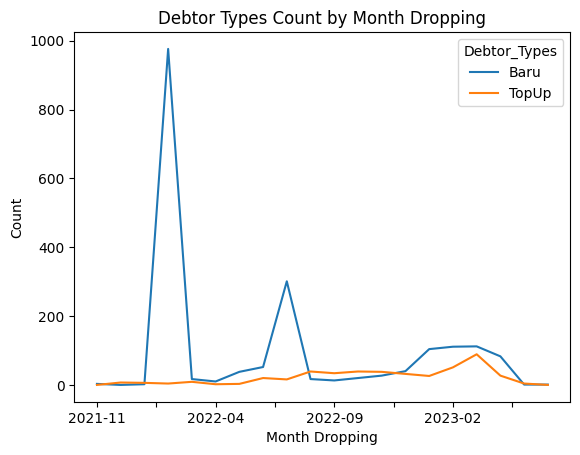

In [523]:
# Assuming merge_data is your DataFrame
# Convert 'Tgl_Dropping' to datetime if it's not already
merge_data['Tgl_Dropping'] = pd.to_datetime(merge_data['Tgl_Dropping'])
merge_data['Month_Dropping'] = pd.to_datetime(merge_data['Tgl_Dropping'], format='%Y%m', errors='coerce').dt.strftime('%Y-%m')

data_filtered = merge_data[merge_data["Month_Dropping"] > "2021-01"]
# Assuming merge_data is your DataFrame
topup_counts = data_filtered.groupby('Month_Dropping')['Debtor_Types'].value_counts().unstack().fillna(0)

# Plotting
topup_counts.plot(kind='line', stacked=False)
plt.title('Debtor Types Count by Month Dropping')
plt.xlabel('Month Dropping')
plt.ylabel('Count')
plt.show()


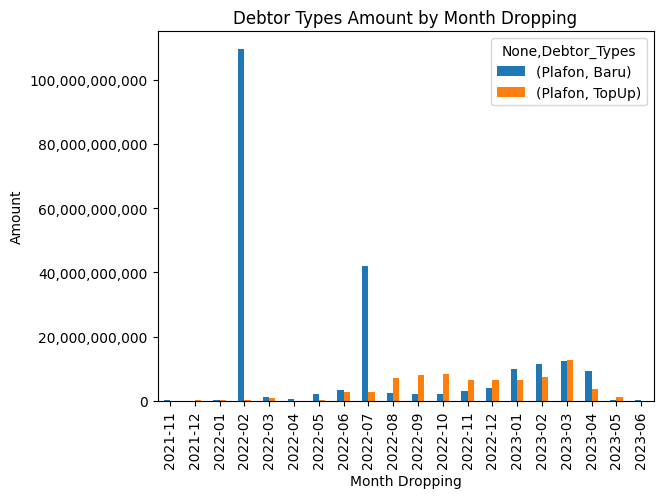

In [522]:
# Assuming merge_data is your DataFrame
# Convert 'Tgl_Dropping' to datetime if it's not already
merge_data['Tgl_Dropping'] = pd.to_datetime(merge_data['Tgl_Dropping'])
merge_data['Month_Dropping'] = pd.to_datetime(merge_data['Tgl_Dropping'], format='%Y%m', errors='coerce').dt.strftime('%Y-%m')

data_filtered = merge_data[merge_data["Month_Dropping"] > "2021-01"]
# Assuming merge_data is your DataFrame
topup_counts = data_filtered.groupby(['Month_Dropping', 'Debtor_Types'])[['Plafon']].sum().unstack(fill_value=0)

# Plotting
ax = topup_counts.plot(kind='bar', stacked=False)
plt.title('Debtor Types Amount by Month Dropping')
plt.xlabel('Month Dropping')
plt.ylabel('Amount')

# Set y-axis formatter to display amounts
ax.get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()
